In [1]:
# import librairies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [2]:
df=pd.read_csv("C:/Users/nehar/Downloads/data_file.csv")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

In [4]:
vector=TfidfVectorizer(max_df=0.4,
                       min_df=1,
                       stop_words=('english'),
                       lowercase=True,
                       use_idf=True,
                       norm=(u'12'),
                       smooth_idf=True)

In [5]:
def find_similar(tfidf_matrix,index,top_n=5):
    cosine_similarities=linear_kernel(tfidf_matrix[index:index+1],tfidf_matrix).flatten()
    related_docs_indices=[i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [6]:
import networkx as nx

In [7]:
import time

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 50
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

# print the centers of the clusters
# for i in range(0,k):
#     word_list=[]
#     print("cluster%d:"% i)
#     for j in centers[i,:10]:
#         word_list.append(terms[j])
#     print(word_list) 
    
request_transform = vector.transform(df['description'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform) 

df['cluster'].value_counts().head()

29    30
3     19
38    12
1     11
18    11
Name: cluster, dtype: int64

In [9]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [10]:
G = nx.Graph(label="Unnamed Women")
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['description'],key=rowi['uuid'],label="Unnamed Woman")
    for element in rowi['description']:
        G.add_node(element,label="Woman")
        G.add_edge(rowi['description'], element, label="in")
   # for element in rowi['categ']:
#G.add_node(element,label="CAT")
        #G.add_edge(rowi['title'], element, label="CAT_IN")
    #for element in rowi['directors']:
        #G.add_node(element,label="PERSON")
        #G.add_edge(rowi['title'], element, label="DIRECTED")
    #for element in rowi['countries']:
        #G.add_node(element,label="COU")
        #G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['description'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['description'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['description'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))   

 iter 0 -- 0.0019783973693847656 seconds --
 finish -- 0.15918183326721191 seconds --


In [11]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m  in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="Unnamed Women":
            colors.append('blue')
        elif G.nodes[e]['label']=="description":
            colors.append('yellow')
        elif G.nodes[e]['label']=="location":
            colors.append('red')
    nx.draw(subgraph,with_labels=True,font_weight='bold',node_color=colors)
    plt.show()

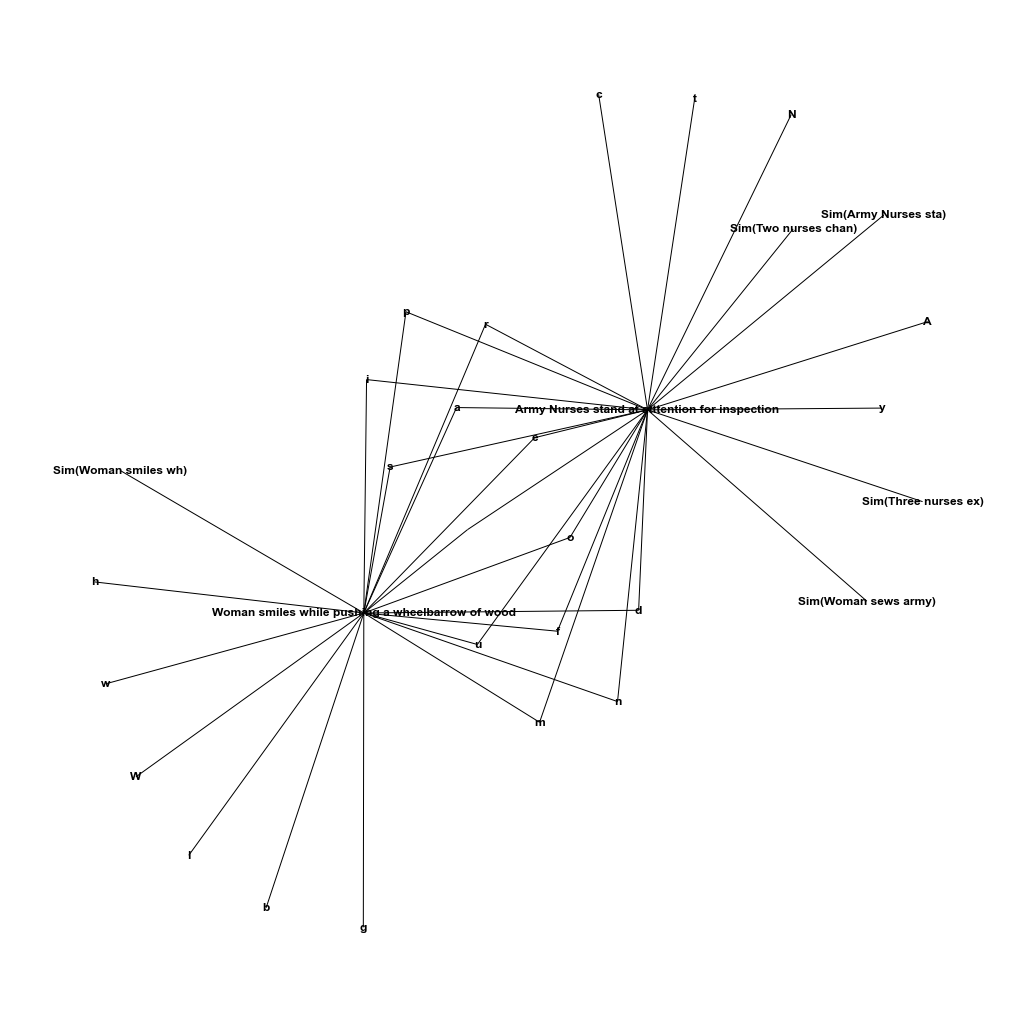

In [12]:
list_in=['Woman smiles while pushing a wheelbarrow of wood','Army Nurses stand at atttention for inspection']
sub_graph= get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [13]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [14]:
def concat_similar(tfidf_matrix, df, index, top_n = 5):
    indices = find_similar(tfidf_matrix, index, top_n)
    similar_df = df.iloc[indices][['uuid', 'description']]
    similar_descriptions = similar_df['description'].tolist()
    return ' | '.join(similar_descriptions)


In [15]:
index = 0
similar_descriptions = concat_similar(tfidf, df, index, top_n = 5)
print(similar_descriptions)


Industrial workers building SS George Washington Carver | Women await Rosa Lee's parole hearing in Georgia | Congregation of Store Front Baptist Church, Chicago | Women working as insurance clerks | Women in the Repair Depot repair military clothing


In [16]:
index = 0
similar_descriptions = concat_similar(tfidf, df, index, top_n=5)
concatenated_output = ''.join(similar_descriptions)
print(concatenated_output)


Industrial workers building SS George Washington Carver | Women await Rosa Lee's parole hearing in Georgia | Congregation of Store Front Baptist Church, Chicago | Women working as insurance clerks | Women in the Repair Depot repair military clothing


In [17]:
concatenated_output = '\\n'.join(similar_descriptions)
print(concatenated_output)

I\nn\nd\nu\ns\nt\nr\ni\na\nl\n \nw\no\nr\nk\ne\nr\ns\n \nb\nu\ni\nl\nd\ni\nn\ng\n \nS\nS\n \nG\ne\no\nr\ng\ne\n \nW\na\ns\nh\ni\nn\ng\nt\no\nn\n \nC\na\nr\nv\ne\nr\n \n|\n \nW\no\nm\ne\nn\n \na\nw\na\ni\nt\n \nR\no\ns\na\n \nL\ne\ne\n'\ns\n \np\na\nr\no\nl\ne\n \nh\ne\na\nr\ni\nn\ng\n \ni\nn\n \nG\ne\no\nr\ng\ni\na\n \n|\n \nC\no\nn\ng\nr\ne\ng\na\nt\ni\no\nn\n \no\nf\n \nS\nt\no\nr\ne\n \nF\nr\no\nn\nt\n \nB\na\np\nt\ni\ns\nt\n \nC\nh\nu\nr\nc\nh\n,\n \nC\nh\ni\nc\na\ng\no\n \n|\n \nW\no\nm\ne\nn\n \nw\no\nr\nk\ni\nn\ng\n \na\ns\n \ni\nn\ns\nu\nr\na\nn\nc\ne\n \nc\nl\ne\nr\nk\ns\n \n|\n \nW\no\nm\ne\nn\n \ni\nn\n \nt\nh\ne\n \nR\ne\np\na\ni\nr\n \nD\ne\np\no\nt\n \nr\ne\np\na\ni\nr\n \nm\ni\nl\ni\nt\na\nr\ny\n \nc\nl\no\nt\nh\ni\nn\ng


In [18]:
import markovify

# Define the text corpus using the concatenated string
text_model = markovify.Text(concatenated_output)

# Generate a new sentence using the Markov chain model
new_sentence = text_model.make_sentence()

# Print the new sentence
print(new_sentence)


I\nn\nd\nu\ns\nt\nr\ni\na\nl\n \nw\no\nr\nk\ne\nr\ns\n \nb\nu\ni\nl\nd\ni\nn\ng\n \nS\nS\n \nG\ne\no\nr\ng\ne\n \nW\na\ns\nh\ni\nn\ng\nt\no\nn\n \nC\na\nr\nv\ne\nr\n \n|\n \nW\no\nm\ne\nn\n \ni\nn\n \nt\nh\ne\n \nR\ne\np\na\ni\nr\n \nD\ne\np\no\nt\n \nr\ne\np\na\ni\nr\n \nm\ni\nl\ni\nt\na\nr\ny\n \nc\nl\no\nt\nh\ni\nn\ng


In [19]:
import pandas as pd
from nltk.tokenize import word_tokenize
import random

# Load the Excel file
df = pd.read_csv("C:/Users/nehar/Downloads/data_file.csv")

# Define the function to check for similarity
def check_similarity(description, df):
    for index, row in df.iterrows():
        similarity = row['description'].lower() == description.lower()
        if similarity:
            return row['description']
    return None

# Concatenate the sentences
sentences = df['description'].tolist()
concatenated_string = ' '.join(sentences)

# Tokenize the words
words = word_tokenize(concatenated_string)

# Shuffle the words randomly
random.shuffle(words)

# Construct a new sentence
new_sentence = ' '.join(words)

# Check for similarity in the Excel file
category = check_similarity(new_sentence, df)

if category:
    print(f"The new sentence '{new_sentence}' belongs to the category '{category}'.")
else:
    print(f"No similar sentence found in the Excel file.")


No similar sentence found in the Excel file.


In [20]:
import nltk
from nltk.tokenize import word_tokenize
import random

# Sample concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Tokenize the words
words = word_tokenize(concatenated_string)

# Shuffle the words randomly
random.shuffle(words)

# Combine the shuffled words into a new sentence
new_sentence = ' '.join(words)

# Print the new sentence
print(new_sentence)


Church , Georgia Repair Depot in of Women Rosa , parole clothing , Baptist SS , Front working Store military hearing building workers Congregation Industrial as Carver Women 's in the Lee Washington George await insurance , repair clerks Chicago Women


In [21]:
import random

# define a list of words
words = ['working',' Church', 'Congregation', 'military', 'insurance' , 'Washington', 'as' , 'Women', 'hearing','of','Carver', 'Rosa', 'await', 'Depot' , 'Lee', 'repair','Store', 'workers', 'George', 'Industrial' , 'Women','Georgia', 'Front','parole', 'in', 'Women' , 'SS', 'the', 'clothing', 'clerks', 'in', 'building','Baptist', 'Repair', 'Chicago']

# shuffle the words randomly
random.shuffle(words)

# join the shuffled words into a sentence
sentence = ' '.join(words)

# print the sentence
print(sentence)


insurance Women Women the working Georgia hearing Front Washington Depot Chicago Rosa Industrial clerks Repair  Church military parole in George Congregation Carver workers of Women clothing as Baptist Store Lee await repair building SS in


In [22]:
import random

# Concatenated words
concatenated_words = "Industrial workers building SS George Washington Carver | Women await Rosa Lee's parole hearing in Georgia | Congregation of Store Front Baptist Church, Chicago | Women working as insurance clerks | Women in the Repair Depot repair military clothing"

# Split the words by the separator |
words = concatenated_words.split(' | ')

# Shuffle the words randomly
random.shuffle(words)

# Combine the shuffled words into a new title
new_title = ' '.join(words)

# Print the new title
print(new_title)


Congregation of Store Front Baptist Church, Chicago Industrial workers building SS George Washington Carver Women await Rosa Lee's parole hearing in Georgia Women working as insurance clerks Women in the Repair Depot repair military clothing


In [23]:
import pandas as pd
import random

# read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# choose a random sentence from the Excel file
row = random.choice(df.index)
sentence = df.loc[row, 'description']

# tokenize the words
words = sentence.split()

# shuffle the words randomly
random.shuffle(words)

# combine the shuffled words into a new sentence
new_sentence = ' '.join(words)

# print the new sentence
print(new_sentence)


during working Women in garment WWI factory a


In [24]:
import pandas as pd

# Read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Get the concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Split the string into words
words = concatenated_string.split()

# Create a set of unique words
unique_words = set(words)

# Loop through each sentence in the Excel file
for index, row in df.iterrows():
    # Get the sentence from the current row
    sentence = row['description']
    
    # Split the sentence into words
    sentence_words = sentence.split()
    
    # Calculate the number of words in common between the sentence and the unique words set
    common_words = len(set(sentence_words).intersection(unique_words))
    
    # If there are at least 2 common words, print the sentence
    if common_words >= 2:
        print(sentence)


Women sitting in front of an empty store in Harlem
Woman dressed in men's clothing
Portrait of women employed by the Navy
Woman reading bible in Store Front Baptist church, Chicago
Industrial worker building SS George Washington Carver
Woman working as a typesetter in Atlanta
Industrial workers building SS George Washington Carver
Women of the National Youth Adminstration meet in Chicago
Industrial workers building SS George Washington Carver
Women working machinery in apron factory
Woman working as nanny feeds child
Women and girls working in a milliner factory
Women and girls working in lampshade factory
Women working in a garment factory during WWI
Women in the Repair Depot repair military clothing
Women working as insurance clerks
Congregation of Store Front Baptist Church, Chicago
Women await Rosa Lee's parole hearing in Georgia
Portrait of woman in black lace dress
Portrait of woman in floral costume
Portrait of a girl with long hair in a white blouse
Portrait of a woman in a str

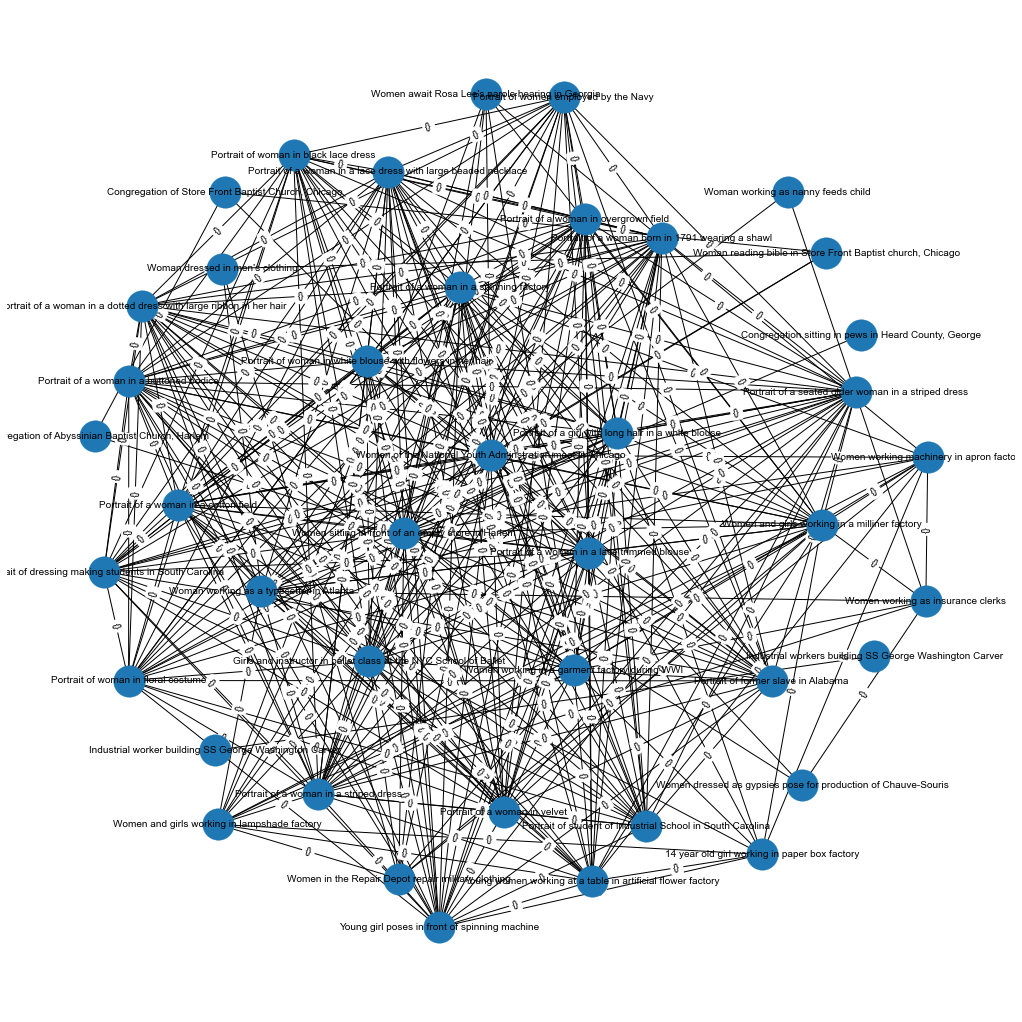

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the list of sentences
sentences = [
    'Women sitting in front of an empty store in Harlem',
    'Woman dressed in men\'s clothing',
    'Portrait of women employed by the Navy',
    'Woman reading bible in Store Front Baptist church, Chicago',
    'Industrial worker building SS George Washington Carver',
    'Woman working as a typesetter in Atlanta',
    'Industrial workers building SS George Washington Carver',
    'Women of the National Youth Adminstration meet in Chicago',
    'Industrial workers building SS George Washington Carver',
    'Women working machinery in apron factory',
    'Woman working as nanny feeds child',
    'Women and girls working in a milliner factory',
    'Women and girls working in lampshade factory',
    'Women working in a garment factory during WWI',
    'Women in the Repair Depot repair military clothing',
    'Women working as insurance clerks',
    'Congregation of Store Front Baptist Church, Chicago',
    'Women await Rosa Lee\'s parole hearing in Georgia',
    'Portrait of woman in black lace dress',
    'Portrait of woman in floral costume',
    'Portrait of a girl with long hair in a white blouse',
    'Portrait of a woman in a striped dress',
    'Portrait of woman in white blouse with flowers in her hair',
    'Portrait of a woman in a lace dress with large beaded necklace',
    'Portrait of a woman in a dotted dress with large ribbon in her hair',
    'Portrait of a woman in a lace trimmed blouse',
    'Portrait of a woman born in 1791 wearing a shawl',
    'Portrait of student of Industrial School in South Carolina',
    'Congregation of Abyssinian Baptist Church, Harlem',
    'Congregation of Abyssinian Baptist Church, Harlem',
    'Portrait of dressing making students in South Carolina',
    'Portrait of a woman in a cotton field',
    'Portrait of a woman in overgrown field',
    'Portrait of former slave in Alabama',
    'Congregation sitting in pews in Heard County, George',
    'Portrait of a woman in a buttoned bodice',
    'Portrait of a woman in velvet',
    'Portrait of a woman in a spinning factory',
    'Young girl poses in front of spinning machine',
    '14 year old girl working in paper box factory',
    'Girls and instructor in ballet class at the NYC School of Ballet',
    'Women dressed as gypsies pose for production of Chauve-Souris',
    'Portrait of a seated older woman in a striped dress',
    'Young women working at a table in artificial flower factory'
]


# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for sentence in sentences:
    G.add_node(sentence)

# Add edges to the graph
for i, node1 in enumerate(G.nodes()):
    for j, node2 in enumerate(G.nodes()):
        if i < j:
            sentence1_words = node1.split()
            sentence2_words = node2.split()
            common_words = set(sentence1_words).intersection(set(sentence2_words))
            if len(common_words) >= 2:
                G.add_edge(node1, node2)

# Draw the graph
k = 3.0

# Draw the graph
pos = nx.spring_layout(G, k=k)
nx.draw(G, pos, node_size=1000, with_labels=True, font_size=10)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

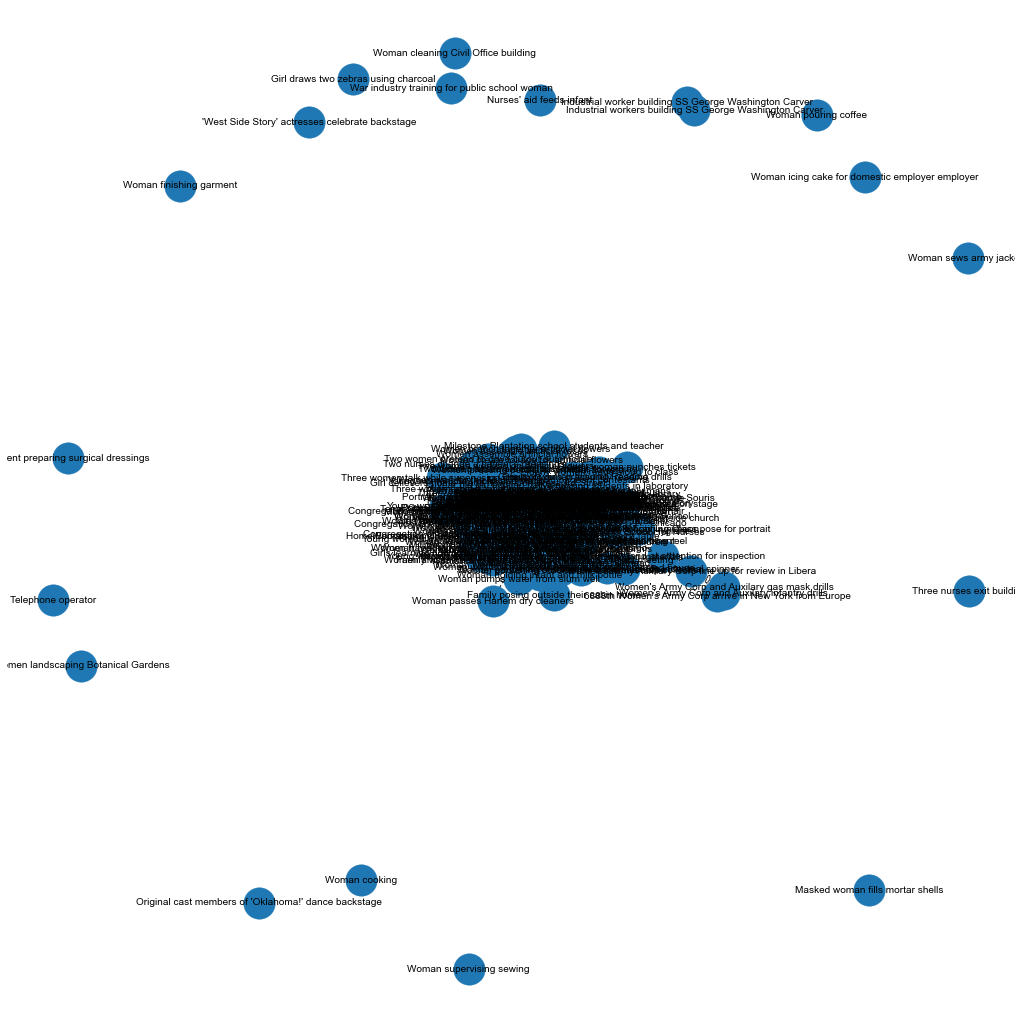

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Get the concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Split the string into words
words = concatenated_string.split()

# Create a set of unique words
unique_words = set(words)

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for index, row in df.iterrows():
    sentence = row['description']
    if sentence not in G.nodes:
        G.add_node(sentence)

# Add edges to the graph
for i, node1 in enumerate(G.nodes()):
    for j, node2 in enumerate(G.nodes()):
        if i < j:
            sentence1_words = node1.split()
            sentence2_words = node2.split()
            common_words = set(sentence1_words).intersection(set(sentence2_words))
            if len(common_words) >= 2:
                G.add_edge(node1, node2)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=1000, with_labels=True, font_size=10)
nx.draw_networkx_edge_labels(G, pos)
plt.show()


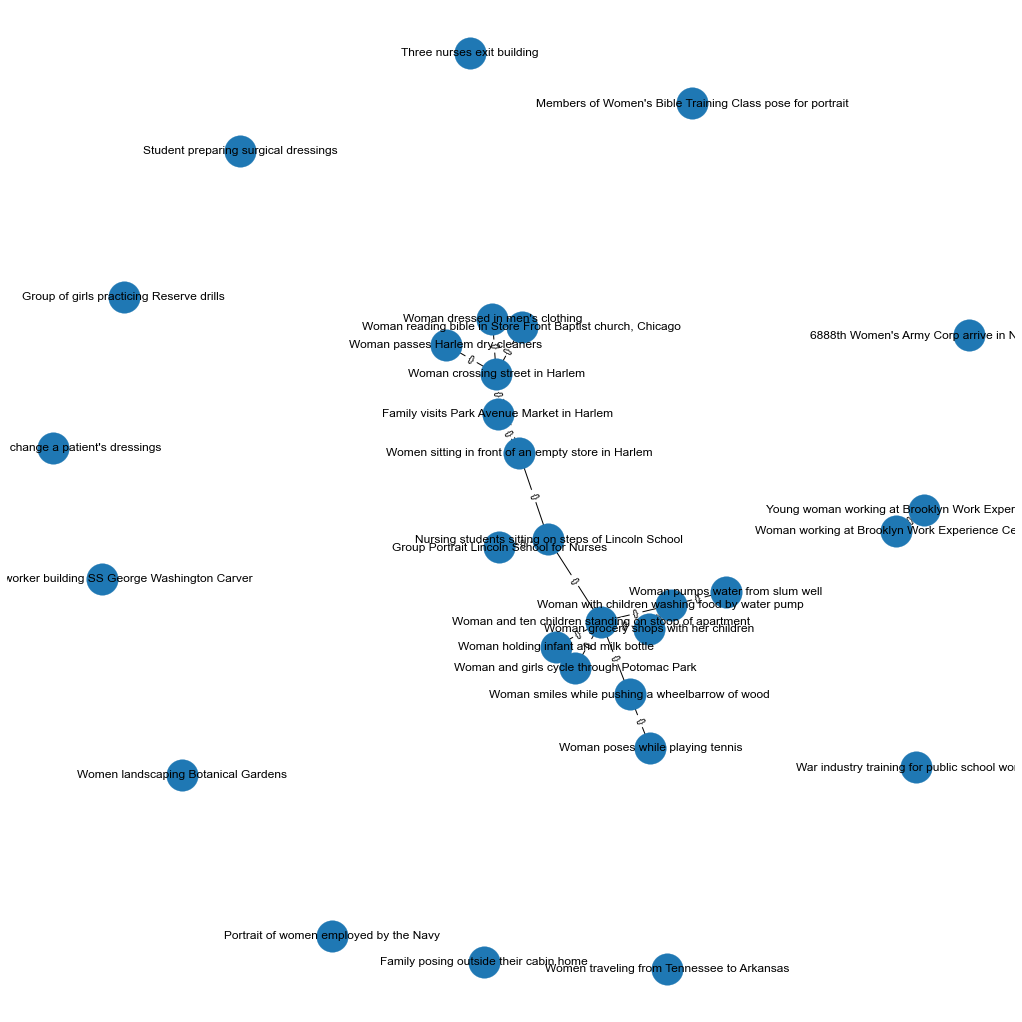

In [81]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Get the concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Split the string into words
words = concatenated_string.split()

# Create a set of unique words
unique_words = set(words)

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
counter = 0
for index, row in df.iterrows():
    if counter < 30:
        sentence = row['description']
        if sentence not in G.nodes:
            G.add_node(sentence)
        counter += 1
    else:
        break

# Add edges to the graph
for i, node1 in enumerate(G.nodes()):
    for j, node2 in enumerate(G.nodes()):
        if i < j:
            sentence1_words = node1.split()
            sentence2_words = node2.split()
            common_words = set(sentence1_words).intersection(set(sentence2_words))
            if len(common_words) >= 2:
                G.add_edge(node1, node2)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=1000, with_labels=True, font_size=12)
nx.draw_networkx_edge_labels(G, pos)
plt.show()


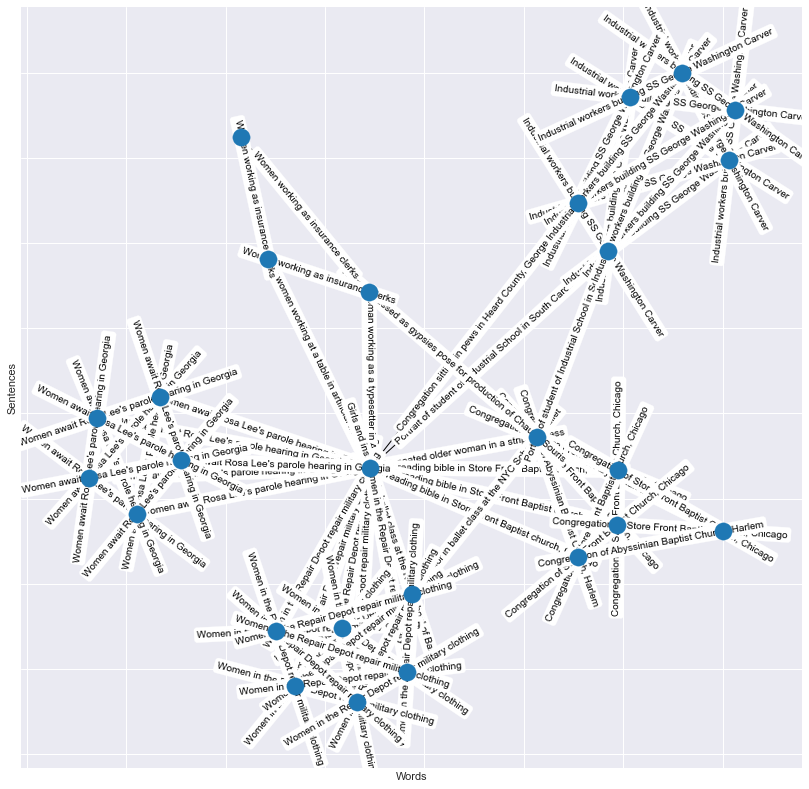

In [54]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Get the concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Split the string into words
words = concatenated_string.split()

# Create a set of unique words
unique_words = set(words)

# Initialize the graph
G = nx.Graph()

# Loop through each sentence in the Excel file
for index, row in df.iterrows():
    # Get the sentence from the current row
    sentence = row['description']
    
    # Split the sentence into words
    sentence_words = sentence.split()
    
    # Calculate the number of words in common between the sentence and the unique words set
    common_words = list(set(sentence_words).intersection(unique_words))
    
    # Add nodes and edges to the graph
    for i in range(len(common_words)):
        for j in range(i+1, len(common_words)):
            G.add_edge(common_words[i], common_words[j], description=sentence)
            
# Set node positions using the spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['description'] for u,v,d in G.edges(data=True)})

# Set axis labels and show the plot
plt.xlabel('Words')
plt.ylabel('Sentences')
plt.show()


In [25]:
import pandas as pd
import plotly.graph_objs as go

# Read the Excel file containing the sentences
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Get the concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

# Split the string into words
words = concatenated_string.split()

# Create a set of unique words
unique_words = set(words)

# Count the frequency of each word in the output
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a list of word-frequency pairs sorted by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Create a bar graph showing the frequency of each word
data = [go.Bar(
            x=[pair[0] for pair in sorted_word_freq],
            y=[pair[1] for pair in sorted_word_freq]
    )]

# Set the layout of the graph
layout = go.Layout(
    title='Frequency of Words in Output',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency')
)

# Create the figure object and display the graph
fig = go.Figure(data=data, layout=layout)
fig.show()


In [26]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import difflib

# read the Excel file containing the descriptions
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# define the given description
given_desc = "in Lincoln lounge students Nursing"

# compare the given description with descriptions in the Excel file
similar_descs = difflib.get_close_matches(given_desc, df['description'], n=3, cutoff=0.6)

# print the similar descriptions
print("Similar descriptions:")
for desc in similar_descs:
    print("- " + desc)

# get recommendations based on the similar descriptions
recommendations = []
for desc in similar_descs:
    row = df[df['description'] == desc].iloc[0]
    recommendations += row['Recommendations'].split(";")

# remove duplicates from recommendations
recommendations = list(set(recommendations))

# print the recommendations
print("\nRecommendations:")
for rec in recommendations:
    print("- " + rec)


Similar descriptions:

Recommendations:


In [28]:
import nltk
from nltk.tokenize import word_tokenize
import random

#Sample concatenated string
concatenated_string = "Industrial workers building SS George Washington Carver,Women await Rosa Lee's parole hearing in Georgia,Congregation of Store Front Baptist Church, Chicago,Women working as insurance clerks,Women in the Repair Depot repair military clothing"

#Tokenize the words
words = word_tokenize(concatenated_string)

#Shuffle the words randomly
random.shuffle(words)

#Combine the shuffled words into a new sentence
new_sentence = ' '.join(words)

#Use NLTK's Part-of-Speech Tagger to get the part-of-speech tags for each word
pos_tags = nltk.pos_tag(words)

#Initialize an empty list to store the noun phrases
noun_phrases = []

#Iterate over the part-of-speech tags and extract the noun phrases
for i in range(len(pos_tags)):
    if pos_tags[i][1].startswith('NN'): # check if the tag starts with 'NN' (i.e. a noun)
        phrase = pos_tags[i][0] # add the current noun to the phrase
        j = i + 1 # move to the next word
        while j < len(pos_tags) and pos_tags[j][1].startswith('NN'): # check if the next word is also a noun
            phrase += ' ' + pos_tags[j][0] # add the next noun to the phrase
            j += 1 # move to the next word
noun_phrases.append(phrase) # add the completed phrase to the list

#Combine the noun phrases into a new description
new_description = ', '.join(noun_phrases)

#Print the new sentence and the new description
print('New sentence:', new_sentence)
print('New description:', new_description)

New sentence: await repair Rosa , , military clothing George Women , Front of the hearing Store Georgia SS in Industrial 's Chicago Lee building Women in Depot parole clerks Congregation , as workers insurance Church , Women Baptist Carver working Repair Washington
New description: Washington


In [29]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the Excel file into a pandas dataframe
df = pd.read_csv("C:/Users/nehar/Downloads/data_file.csv")

# Get the new sentence from the user
new_sentence = input("in of as Congregation Baptist hearing clothing , workers Church military Store clerks 's , , insurance the parole Front await in building George Women Georgia working Lee Industrial Rosa Women Repair Chicago , , Carver Washington Depot SS repair Women ")

# Create a TF-IDF vectorizer and fit it on the new sentence
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit([new_sentence])

# Create a TF-IDF matrix for the new sentence
tfidf_new_sentence = tfidf_vectorizer.transform([new_sentence])

# Create a TF-IDF matrix for the sentences in the Excel file
tfidf_excel = tfidf_vectorizer.transform(df["Column_name_with_sentences"])

# Calculate the cosine similarity between the new sentence and the sentences in the Excel file
cosine_similarities = cosine_similarity(tfidf_new_sentence, tfidf_excel)

# Get the index of the most similar sentence in the Excel file
most_similar_index = cosine_similarities.argmax()

# Get the most similar sentence from the Excel file
most_similar_sentence = df.loc[most_similar_index, "Column_name_with_sentences"]

# Print the most similar sentence
print("The most similar sentence in the Excel file is:", most_similar_sentence)


KeyboardInterrupt: Interrupted by user

in of as Congregation Baptist hearing clothing , workers Church military Store clerks 's , , insurance the parole Front await in building George Women Georgia working Lee Industrial Rosa Women Repair Chicago , , Carver Washington Depot SS repair Women Industrial Rosa


In [ ]:
pip install --upgrade nltk


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')



In [ ]:
# Create a new DependencyGraph
dep_graph = DependencyGraph()

# Add nodes to the DependencyGraph
for i, word in enumerate(words):
    dep_graph.add_node(i+1)
    
# Add words and part-of-speech tags to the DependencyGraph
for i, (word, tag) in enumerate(pos_tags):
    dep_graph.nodes[i+1]['word'] = word
    dep_graph.nodes[i+1]['tag'] = tag
    
# Add arcs to the DependencyGraph
for i, (head, rel, dep) in enumerate(dep_parse.triples()):
    dep_graph.add_arc(head[0], dep[0], rel=rel)


In [ ]:
import nltk
from nltk.parse.corenlp import CoreNLPDependencyParser

# Download and initialize the CoreNLP parser
nltk.download('punkt')
nltk.download('corenlp')
dep_parser = CoreNLPDependencyParser()

# Input sentence
sentence = "in of as Congregation Baptist hearing clothing , workers Church military Store clerks 's , , insurance the parole Front await in building George Women Georgia working Lee Industrial Rosa Women Repair Chicago , , Carver Washington Depot SS repair Women "

# Parse the sentence and extract the dependencies
parse = next(dep_parser.raw_parse(sentence))
dep_graph = parse.to_conll(4)

# Split the dependencies into individual lines and extract the words
dep_lines = dep_graph.strip().split('\n')
words = [line.split('\t')[1] for line in dep_lines]

# Create a DependencyGraph object
dep_graph = nltk.parse.DependencyGraph()

# Add nodes to the DependencyGraph
for i in range(len(words)):
    dep_graph.add_node(i+1, word=words[i])

# Add arcs to the DependencyGraph
for line in dep_lines:
    parts = line.strip().split('\t')
    if parts[0].isdigit():
        dep_graph.add_arc(int(parts[0]), int(parts[2]), relation=parts[3])

# Print the DependencyGraph
print(dep_graph.to_conll(4))


In [4]:
import pandas as pd
import random

# Read the Excel file
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Select the column containing the descriptions
descriptions = df['description']

# Define a function to generate random sentences
def generate_sentence(description):
    sentence = []
    words = description.split()
    for i in range(random.randint(5, 15)):
        sentence.append(random.choice(words))
    return ' '.join(sentence)

# Generate 10 random sentences from each description
for description in descriptions:
    for i in range(10):
        print(generate_sentence(description))


pushing of wheelbarrow smiles pushing Woman
while smiles wheelbarrow smiles wheelbarrow while while Woman Woman
Woman wheelbarrow wood pushing wood a smiles of smiles wheelbarrow smiles
wood wheelbarrow wheelbarrow while smiles pushing wood
of pushing smiles Woman smiles Woman smiles pushing wheelbarrow a a
smiles pushing while pushing wood
wood wheelbarrow Woman of smiles of Woman wheelbarrow wood pushing a
a Woman pushing smiles wheelbarrow of Woman Woman a while pushing wheelbarrow smiles
a wood of while a a of
of a a wood pushing wood while wood pushing
pumps pumps water pumps Woman Woman well pumps Woman from pumps slum Woman Woman
well from water slum water
from water water slum slum well from Woman well Woman slum Woman
well Woman Woman Woman slum
well Woman well pumps from slum well water Woman slum
Woman Woman slum slum pumps water
Woman well well slum Woman Woman from well Woman well well
water pumps well slum from slum water slum
pumps well water slum from Woman pumps water 

In [5]:
import pandas as pd
import random

# Read the Excel file
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Select the column containing the descriptions
descriptions = df['description']

# Define a function to generate random sentences
def generate_sentence(description):
    sentence = []
    words = description.split()
    for i in range(random.randint(5, 15)):
        sentence.append(random.choice(words))
    return ' '.join(sentence)

# Generate 10 random sentences from each description and store them in a list
sentences = []
for description in descriptions:
    for i in range(10):
        sentence = generate_sentence(description)
        sentences.append(sentence)

# Create a Pandas dataframe with the generated sentences
df_output = pd.DataFrame(sentences, columns=['Generated Sentence'])

# Save the dataframe to an Excel file
df_output.to_excel('output.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'output.xlsx'

In [6]:
import pandas as pd
import random

# Read the Excel file containing the descriptions
df = pd.read_csv('C:/Users/nehar/Downloads/data_file.csv')

# Select the column containing the descriptions
descriptions = df['description']

# Define a function to generate random sentences and match them to their parent description
def generate_and_match_sentence(description):
    sentence_list = []
    for i in range(10):
        sentence = generate_sentence(description)
        sentence_list.append(sentence)
    return sentence_list

# Create a dictionary to store the generated sentences and their corresponding parent descriptions
output_dict = {'Generated Sentence': [], 'Parent Description': []}

# Loop over each description, generate 10 random sentences, and match them to their corresponding parent description
for i in range(len(descriptions)):
    description = descriptions[i]
    sentence_list = generate_and_match_sentence(description)
    for sentence in sentence_list:
        output_dict['Generated Sentence'].append(sentence)
        output_dict['Parent Description'].append(description)

# Create a Pandas dataframe with the generated sentences and their corresponding parent descriptions
df_output = pd.DataFrame(output_dict)

# Save the dataframe to an Excel file
df_output.to_excel('output2_file.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'output2_file.xlsx'

In [7]:


# Read the output file
df_output = pd.read_excel('output2_file.xlsx')

# Read the initial Excel file
df_initial = pd.read_excel('C:/Users/nehar/OneDrive/Desktop/ImageLink.xlsx')

# Merge the dataframes on the "Parent Description" column
df_merged = pd.merge(df_output, df_initial, on='Parent Description')

# Select the relevant columns and save the merged dataframe to a new Excel file
df_merged[['Parent Description', 'Generated Sentence', 'ImageLink']].to_excel('matched_output.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'matched_output.xlsx'

In [11]:
from flask import Flask, render_template, request


app = Flask(__name__)

# Read the Excel file
df = pd.read_excel('matched_output.xlsx')

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/search', methods=['POST'])
def search():
    # Get the search keyword from the form data
    keyword = request.form['keyword']
    
    # Filter the dataframe to get the rows containing the keyword
    filtered_df = df[df['Generated Sentence'].str.contains(keyword, case=False)]
    
    # Get the first image link from the filtered dataframe
    image_link = filtered_df.iloc[0]['ImageLink']
    
    # Render the result page with the image link
    return render_template('result.html', image_link=image_link)

if __name__ == '__main__':
    app.run(port=8000)(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
[2023-04-27 01:48:50,171] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\nehar\AppData

TypeError: 'NoneType' object is not callable

In [ ]:
from flask import Flask, render_template, request
import pandas as pd

app = Flask(__name__)

# Read the Excel file containing the data
df = pd.read_excel('matched_output.xlsx')

# Define the route for the search page
@app.route('/')
def search_page():
    return render_template('search.html')

# Define the route for the search results
@app.route('/search', methods=['POST'])
def search_results():
    # Get the search query from the form
    query = request.form['query']
    # Filter the dataframe to get rows where the Description column contains the search query
    filtered_df = df[df['Generated Sentence'].str.contains(query, case=False)]
    # If there are no results, display a message on the search page
    if filtered_df.empty:
        message = f"No results found for '{query}'."
        return render_template('search.html', message=message)
    # If there are results, get the first row and return the image link
    else:
        image_link = filtered_df.iloc[0]['ImageLink']
        return render_template('results.html', image_link=image_link)

if __name__ == '__main__':
    app.run(port=8000)(debug=True)


In [ ]:
%tb

In [ ]:
import pandas as pd
from flask import Flask, render_template, request

app = Flask(__name__)

# Read Excel file
df = pd.read_excel("matched_output.xlsx")

@app.route("/")
def home():
    return render_template("home.html")

@app.route("/search", methods=["GET", "POST"])
def search():
    if request.method == "POST":
        keyword = request.form["keyword"]
        filtered_df = df[df["Generated Sentence"].str.contains(keyword, case=False)]
        if not filtered_df.empty:
            image_url = filtered_df["ImageLink"].iloc[0]
            return render_template("result.html", keyword=keyword, image_url=image_url)
    return render_template("search.html")

if __name__ == '__main__':
    app.run(port=8000)(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
[2023-04-27 02:10:33,246] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\nehar\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\nehar\AppData